In [1]:
import pandas as pd
import polars as pl
import yfinance as yf 
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
import numpy as np

In [3]:
sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(sp500_url)
sp500_tickers = sp500_table[0]["Symbol"].tolist()
top_20 = ["AAPL", "MSFT", "AMZN", "NVDA", "GOOGL", "AMD", "TSLA", "META", "BRK-B", "UNH", "JNJ", "JPM", "V", "PG", "MA", "HD", "CVX", "LLY", "PFE", "XOM"]


In [3]:
def download_sp500_data(start="2010-01-01", end="2024-12-31"):
    data = yf.download(top_20, start=start, 
                       end=end, group_by='ticker', progress=True)
    return data
sp500_data_write = download_sp500_data()
sp500_data_write.columns = [f"{stock}_{attribute}" 
                for stock, attribute in sp500_data_write.columns]
sp500_data_write.reset_index().to_parquet("sp500_stocks.parquet")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  20 of 20 completed


In [2]:
df_sp500 = (pl.read_parquet('sp500_stocks.parquet'))
# sp500 = df_sp500.select([col for col in df_sp500.columns 
#                          if col.endswith(('Open', 'Close'))])
sp500_close = pl.concat([df_sp500.select('Date'),
        df_sp500.select([col for col in df_sp500.columns 
        if col.endswith(('Close'))])],how='horizontal')



<Axes: >

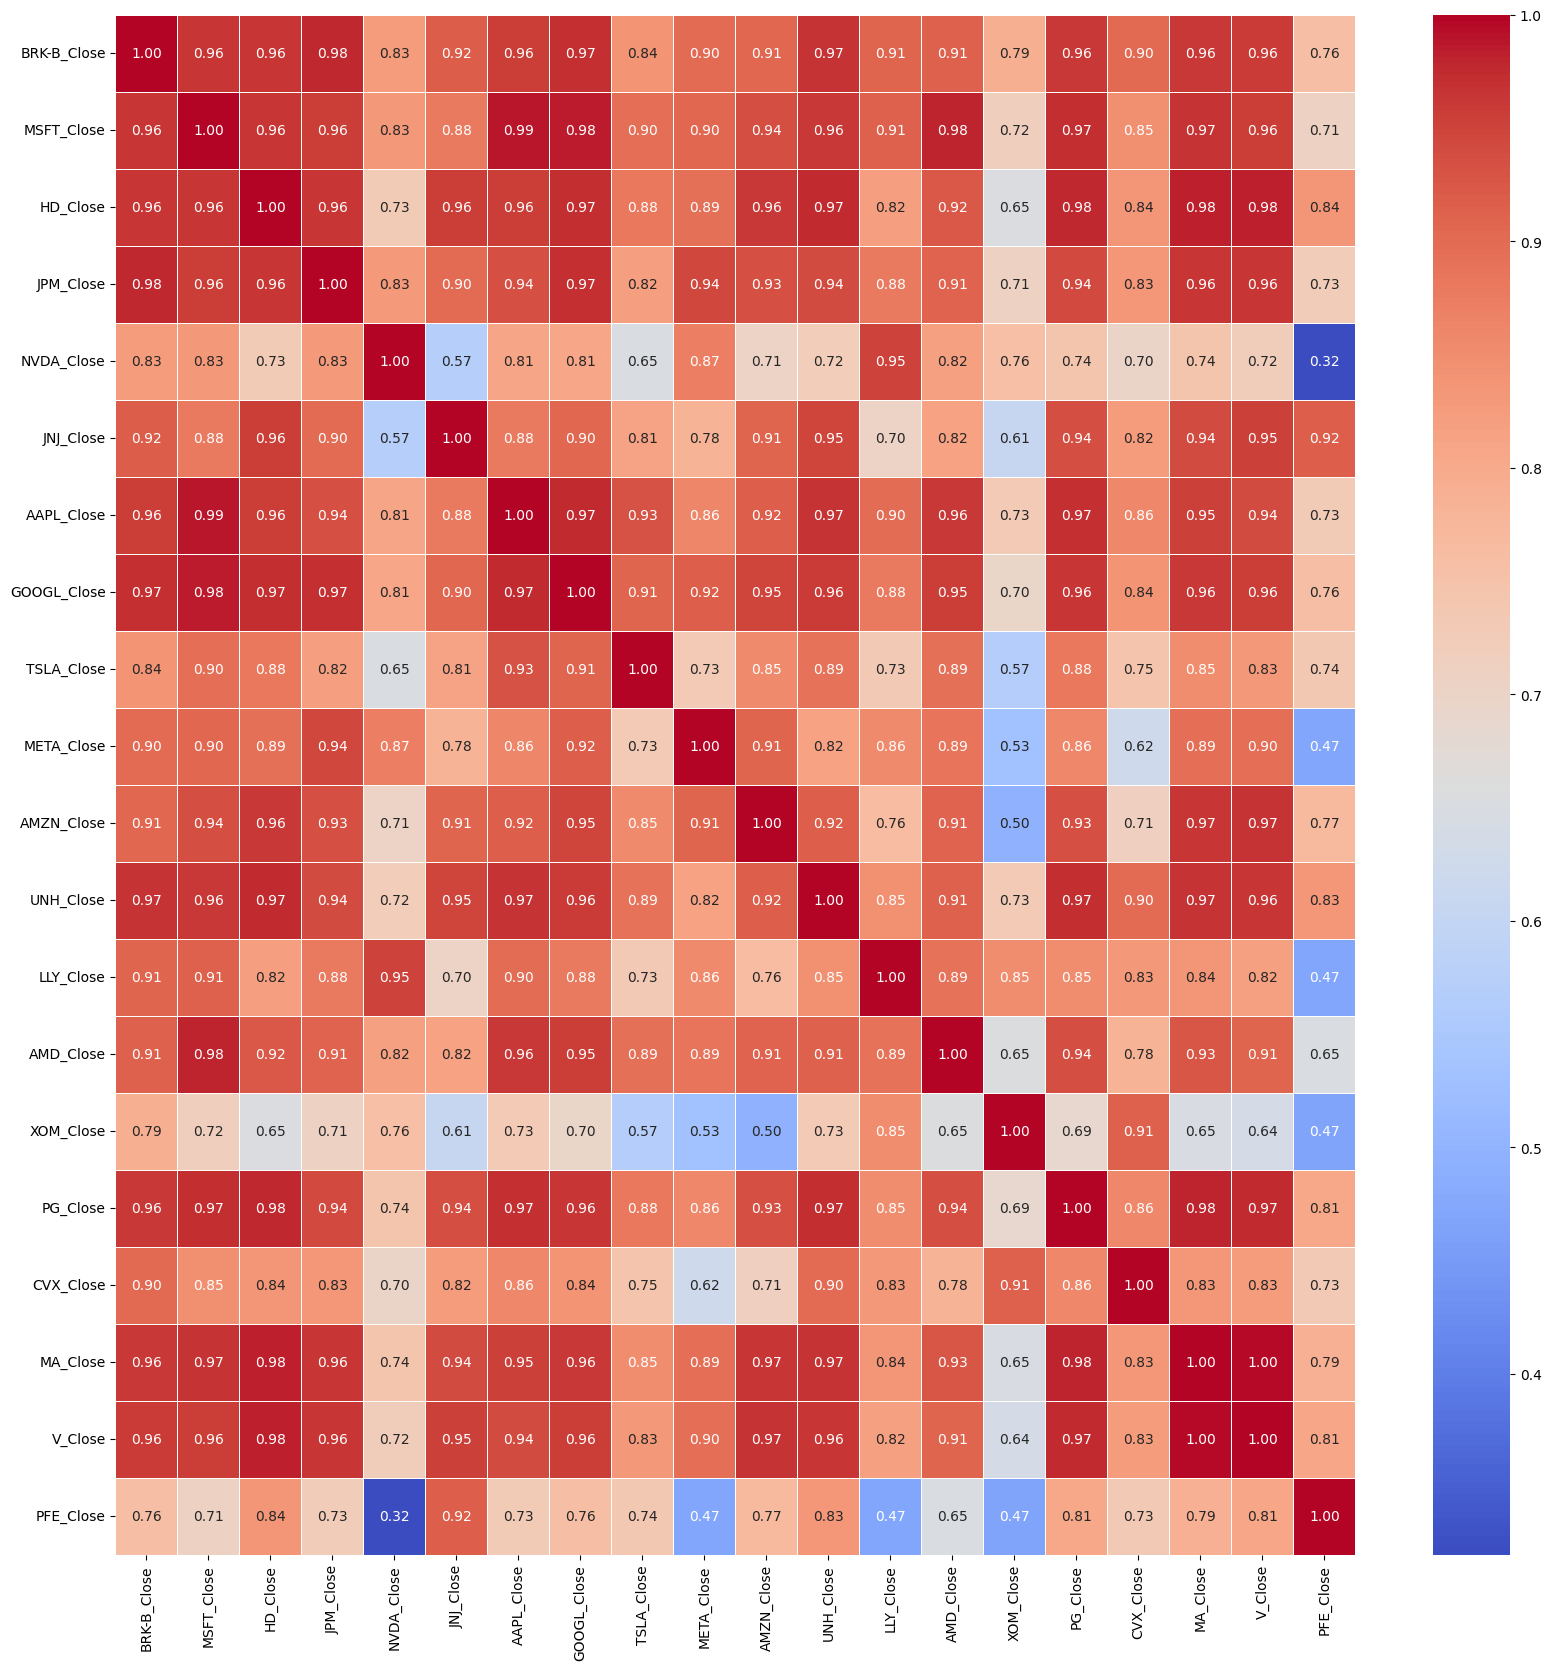

In [3]:
sp500_close_pd = sp500_close.to_pandas()
sp500_corr = sp500_close_pd.drop('Date', axis=1).corr()
plt.figure(figsize=(20,20))
sns.heatmap(sp500_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [86]:
sp500_corr

,BRK-B_Close,MSFT_Close,HD_Close,JPM_Close,NVDA_Close,JNJ_Close,AAPL_Close,GOOGL_Close,TSLA_Close,META_Close,AMZN_Close,UNH_Close,LLY_Close,AMD_Close,XOM_Close,PG_Close,CVX_Close,MA_Close,V_Close,PFE_Close
BRK-B_Close,1.000000,0.964621,0.964616,0.978274,0.825644,0.918679,0.956386,0.969384,0.838981,0.900249,0.906085,0.967239,0.908448,0.914971,0.790531,0.961719,0.902801,0.961510,0.959183,0.758531
MSFT_Close,0.964621,1.000000,0.963234,0.955996,0.830242,0.879002,0.987459,0.984335,0.895848,0.904988,0.936363,0.961465,0.914203,0.979771,0.716176,0.971592,0.847285,0.967722,0.955941,0.709854
HD_Close,0.964616,0.963234,1.000000,0.963931,0.728319,0.956191,0.956207,0.972432,0.882080,0.891256,0.960663,0.974690,0.821254,0.924708,0.654143,0.978155,0.836757,0.983031,0.984002,0.835409
JPM_Close,0.978274,0.955996,0.963931,1.000000,0.829922,0.899596,0.935546,0.968371,0.820866,0.944498,0.934895,0.939166,0.879641,0.911772,0.706483,0.943167,0.833536,0.964614,0.963709,0.725374
NVDA_Close,0.825644,0.830242,0.728319,0.829922,1.000000,0.570907,0.810520,0.807679,0.651255,0.870827,0.705109,0.721967,0.950722,0.816937,0.757849,0.744933,0.698377,0.743410,0.719733,0.320196
JNJ_Close,0.918679,0.879002,0.956191,0.899596,0.570907,1.000000,0.878051,0.904751,0.811688,0.783146,0.908242,0.947653,0.704563,0.816614,0.605944,0.937902,0.824800,0.938930,0.953562,0.916311
AAPL_Close,0.956386,0.987459,0.956207,0.935546,0.810520,0.878051,1.000000,0.974029,0.931069,0.861771,0.916234,0.967889,0.898311,0.962557,0.729174,0.968479,0.858776,0.953629,0.939083,0.728032
GOOGL_Close,0.969384,0.984335,0.972432,0.968371,0.807679,0.904751,0.974029,1.000000,0.907191,0.915331,0.947581,0.959775,0.880133,0.954953,0.697268,0.964192,0.838122,0.960854,0.956530,0.759070
TSLA_Close,0.838981,0.895848,0.882080,0.820866,0.651255,0.811688,0.931069,0.907191,1.000000,0.729355,0.854227,0.888592,0.732741,0.892666,0.568829,0.882306,0.745158,0.848983,0.832430,0.736079
META_Close,0.900249,0.904988,0.891256,0.944498,0.870827,0.783146,0.861771,0.915331,0.729355,1.000000,0.909053,0.816727,0.855983,0.888374,0.532304,0.857686,0.624390,0.894270,0.895949,0.470137


In [4]:
formation_period = sp500_close_pd[(sp500_close_pd['Date'] > dt.datetime(2022,1,1)) &
                               (sp500_close_pd['Date'] < dt.datetime(2022,12,31))]

In [ ]:
pairs = []
for n, stock in enumerate(formation_period.iloc[:, 1:].columns):
    high_corr = sp500_corr[stock][sp500_corr[stock] > 0.85]
    stock_compare = high_corr.index.to_list()
    stock_compare.remove(stock)

    for i, corr_stock in enumerate(stock_compare):
        pairs.append((stock, corr_stock))

# Define subplot grid (3 columns)
num_pairs = len(pairs)
num_rows = int(np.ceil(num_pairs / 3))  # Calculate rows based on number of pairs
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Adjust figure size

# Flatten axes for easy iteration (handles different row numbers)
axes = axes.flatten()

# Plot each stock pair in a subplot
for idx, (stock, corr_stock) in enumerate(pairs):
    ax = axes[idx]

    # Plot stock lines
    sns.lineplot(data=formation_period, x='Date', y=stock, color='red', label=stock, ax=ax)
    sns.lineplot(data=formation_period, x='Date', y=corr_stock, color='blue', label=corr_stock, ax=ax)

    # Customize each subplot
    ax.set_title(f'{stock} vs {corr_stock}')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide empty subplots if the number of pairs isn't a multiple of 3
for idx in range(len(pairs), len(axes)):
    fig.delaxes(axes[idx])

# Show the entire figure
plt.tight_layout()
plt.show()


In [89]:
# potential_pairs = [('AMZN_Close', 'META_Close'), ('AMZN_Close', 'AMD_Close'), ('AMZN_Close', "GOOGL_Close"),
#                    ('AMZN_Close', 'AAPL_Close'), ('AMZN_Close', 'BRK-B_Close'), ('BRK-B_Close', 'MSFT_Close'), 
#                    ('BRK-B_Close', 'MA_Close'), ('BRK-B_Close', 'LLY_Close'), ('MSFT_Close', 'HD_Close'), 
#                    ('JPM_Close', 'PG_Close'), ('MA_Close', 'HD_Close'), ('AMD_Close', 'JPM_Close'), 
#                     ('AMD_Close', 'GOOGL_Close'), ('GOOGL_Close', 'AMD_Close'), ('GOOGL_Close', 'JPM_Close'), 
#                     ('GOOGL_Close', 'AAPL_Close'), ('LLY_Close', 'BRK-B_Close'), ('V_Close', 'AAPL_Close'), 
#                     ('GOOGL_Close', 'V_Close'), ('AMZN_Close')]
# len(potential_pairs)

In [6]:
pairs_dict = {'pair': [], 'adf_spread': [], 'adf_ratio' : [], 'coint_test' : []}
df_dict = {}
for pair in pairs:
    df_test = formation_period[['Date',pair[0],pair[1]]].copy()
    coint_test = coint(df_test[pair[0]], df_test[pair[1]])
    df_test['Spread'] = df_test[pair[0]] - df_test[pair[1]]
    df_test['Ratio'] = df_test[pair[0]]/df_test[pair[1]]
    adf_spread = adfuller(df_test['Spread'])
    adf_ratio = adfuller(df_test['Ratio'])
    df_dict[f'({pair[0]}, {pair[1]})'] = df_test
    pairs_dict['pair'].append(pair)
    pairs_dict['adf_spread'].append(adf_spread[1])
    pairs_dict['adf_ratio'].append(adf_ratio[1])
    pairs_dict['coint_test'].append(coint_test[1])

pd.DataFrame(pairs_dict)
pairs_ver = pd.DataFrame(pairs_dict).sort_values(by=['adf_spread','adf_ratio'])
pairs_ver['adf_spread_check'] = np.where(pairs_ver['adf_spread'] <= 0.05, 1, 0)
pairs_ver['adf_ratio_check'] = np.where(pairs_ver['adf_ratio'] <= 0.05, 1, 0)
pairs_ver['coint_test_check'] = np.where(pairs_ver['coint_test'] <= 0.05, 1, 0)


In [8]:
len(pairs_ver[(pairs_ver['adf_spread_check'] == 1) |  
           (pairs_ver['adf_ratio_check'] == 1)] 
           .drop_duplicates(['adf_spread'])
           .sort_values(by='coint_test'))

24

Text(0.5, 1.0, 'JPM/HD spread Z-score')

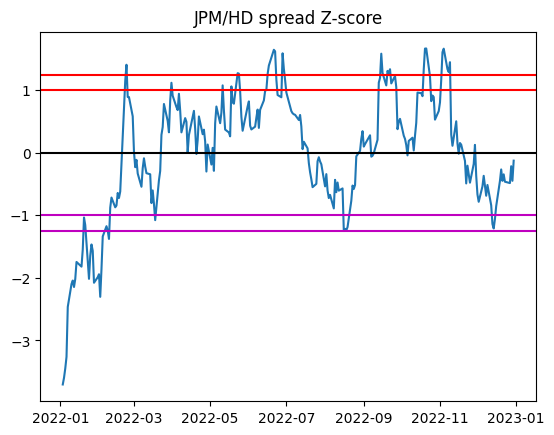

In [92]:
jp_hd = df_dict["(JPM_Close, HD_Close)"]
jp_hd['spread_z_score'] = ((jp_hd['Spread'] - jp_hd['Spread'].mean())/jp_hd['Spread'].std())
plt.plot(jp_hd['Date'], jp_hd['spread_z_score'],  label='Z Scores')
plt.axhline( jp_hd['spread_z_score'].mean(), color='black')
plt.axhline(1.25, color='r')
plt.axhline(1, color='r')
plt.axhline(-1, color='m')
plt.axhline(-1.25, color='m')
plt.title('JPM/HD spread Z-score')

Text(0.5, 1.0, 'JPM/HD ratio Z-score')

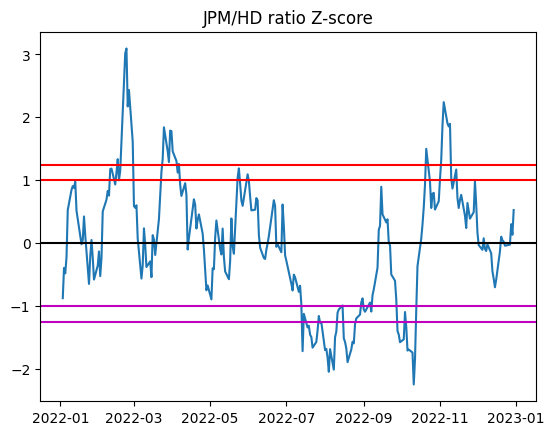

In [93]:
jp_hd['ratio_z_score'] = ((jp_hd['Ratio'] - jp_hd['Ratio'].mean())/jp_hd['Ratio'].std())
plt.plot(jp_hd['Date'], jp_hd['ratio_z_score'],  label='Z Scores')
plt.axhline( jp_hd['ratio_z_score'].mean(), color='black')
plt.axhline(1.25, color='r')
plt.axhline(1, color='r')
plt.axhline(-1, color='m')
plt.axhline(-1.25, color='m')
plt.title('JPM/HD ratio Z-score')

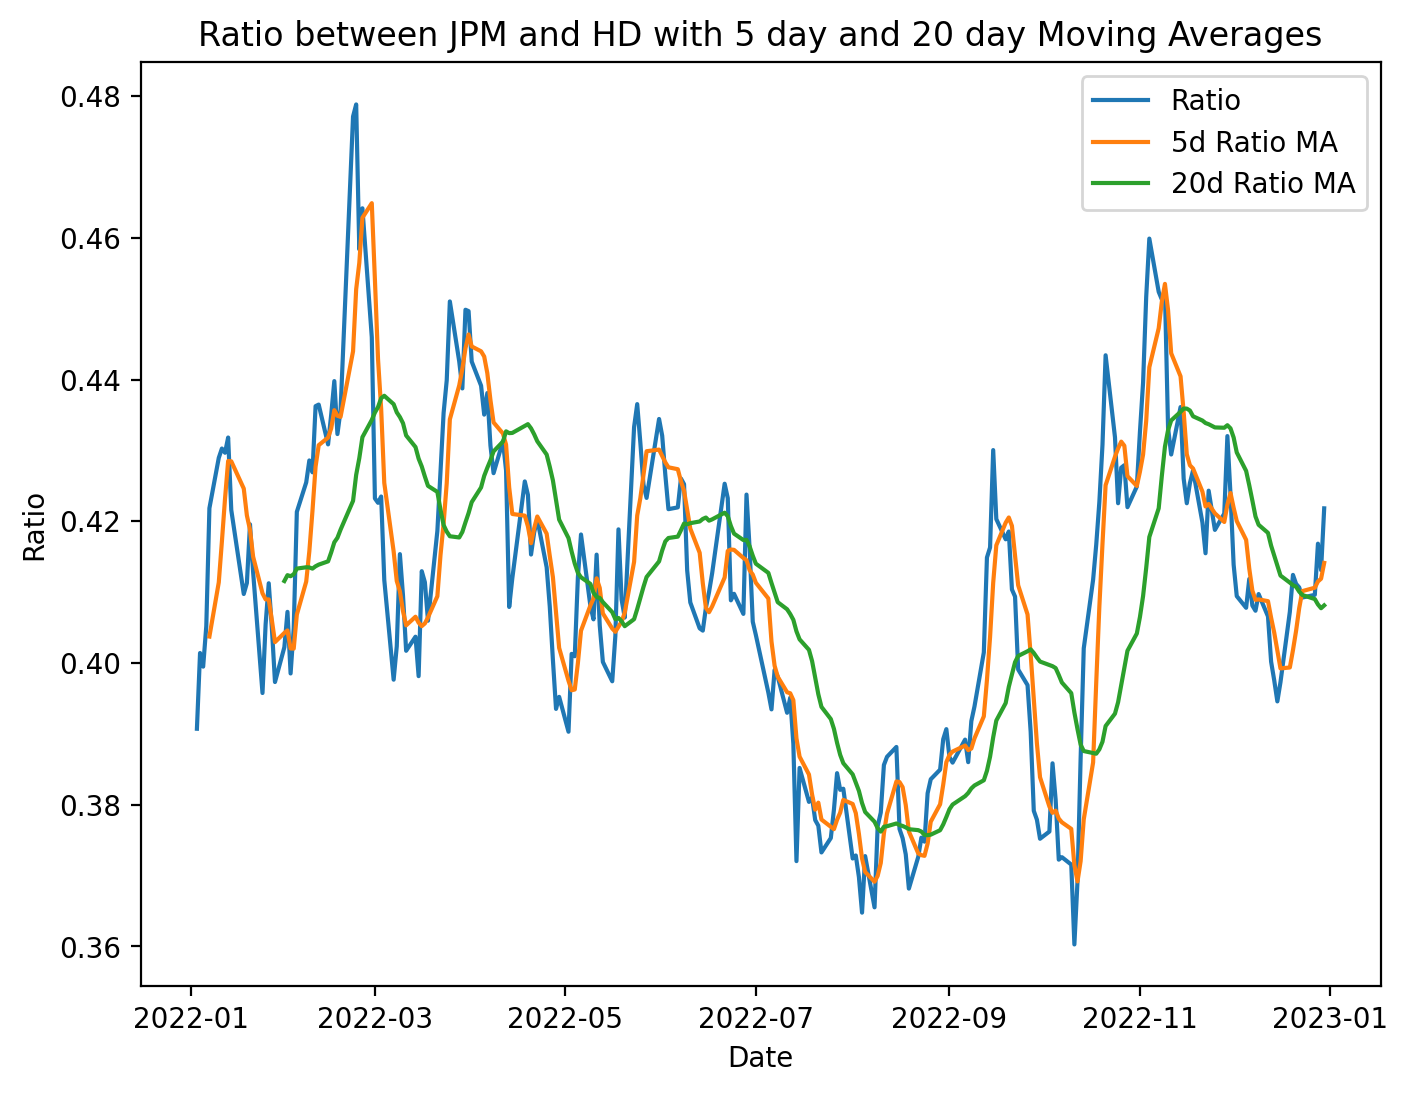

In [94]:
plt.figure(figsize=(8, 6), dpi=200)
jp_hd['ratios_mavg5'] = jp_hd['Ratio'].rolling(window=5, center=False).mean()
jp_hd['ratios_mavg20'] = jp_hd['Ratio'].rolling(window=20, center=False).mean()
std_20 = jp_hd['Ratio'].rolling(window=20, center=False).std()
jp_hd['zscore_20_5'] = (jp_hd['ratios_mavg5'] - jp_hd['ratios_mavg20'])/std_20
plt.plot(jp_hd['Date'], jp_hd['Ratio'])
plt.plot(jp_hd['Date'], jp_hd['ratios_mavg5'])
plt.plot(jp_hd['Date'], jp_hd['ratios_mavg20'])
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between JPM and HD with 5 day and 20 day Moving Averages')
plt.show()

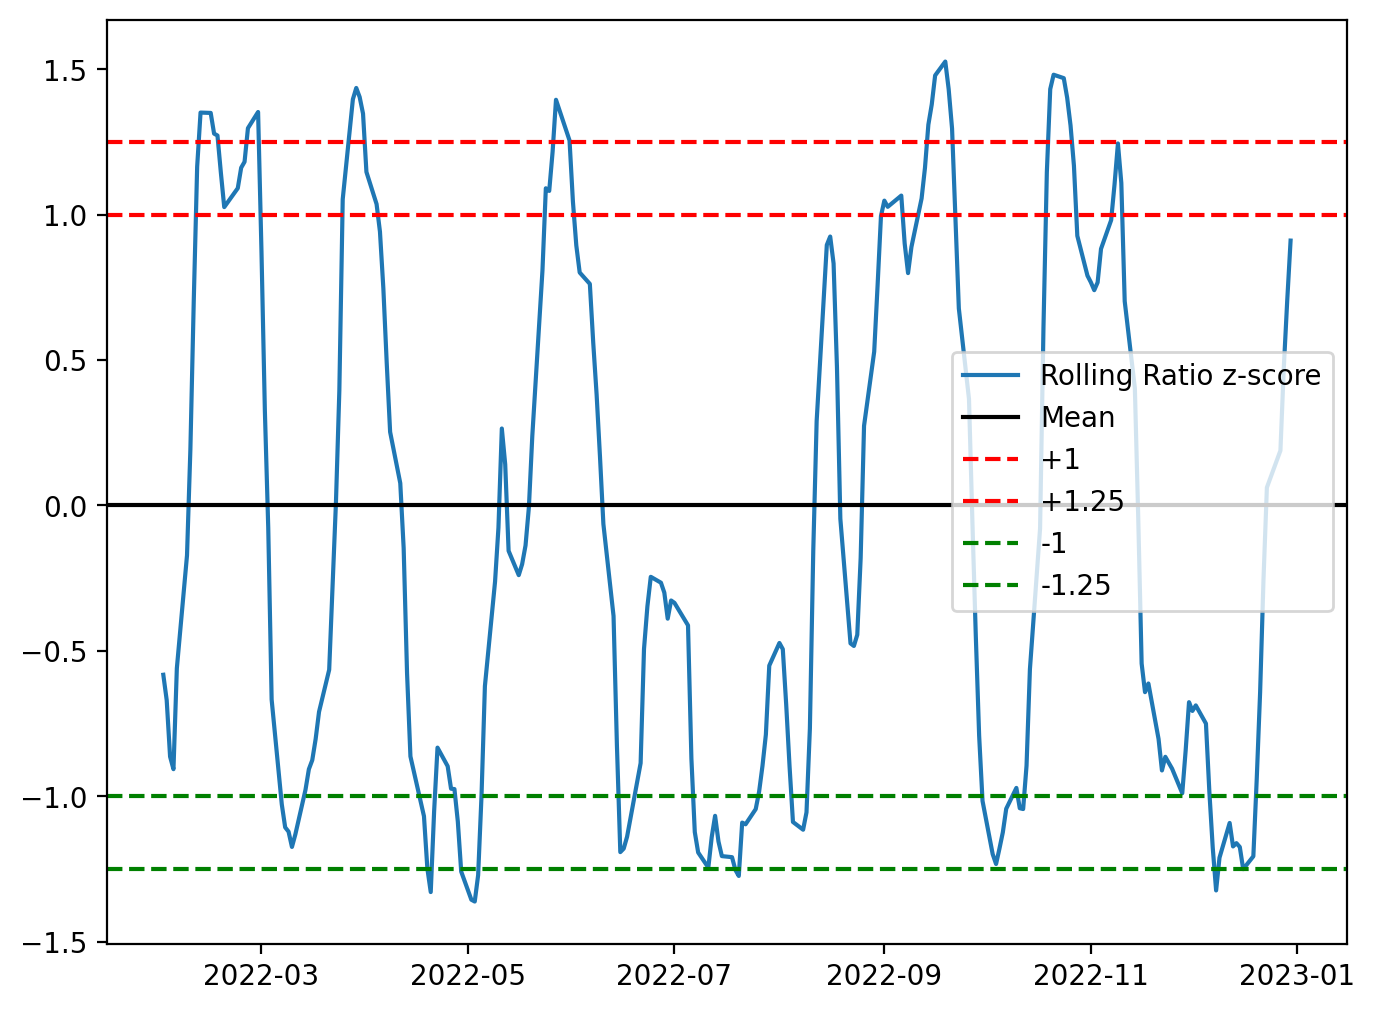

In [95]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(jp_hd['Date'], jp_hd['zscore_20_5'])
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

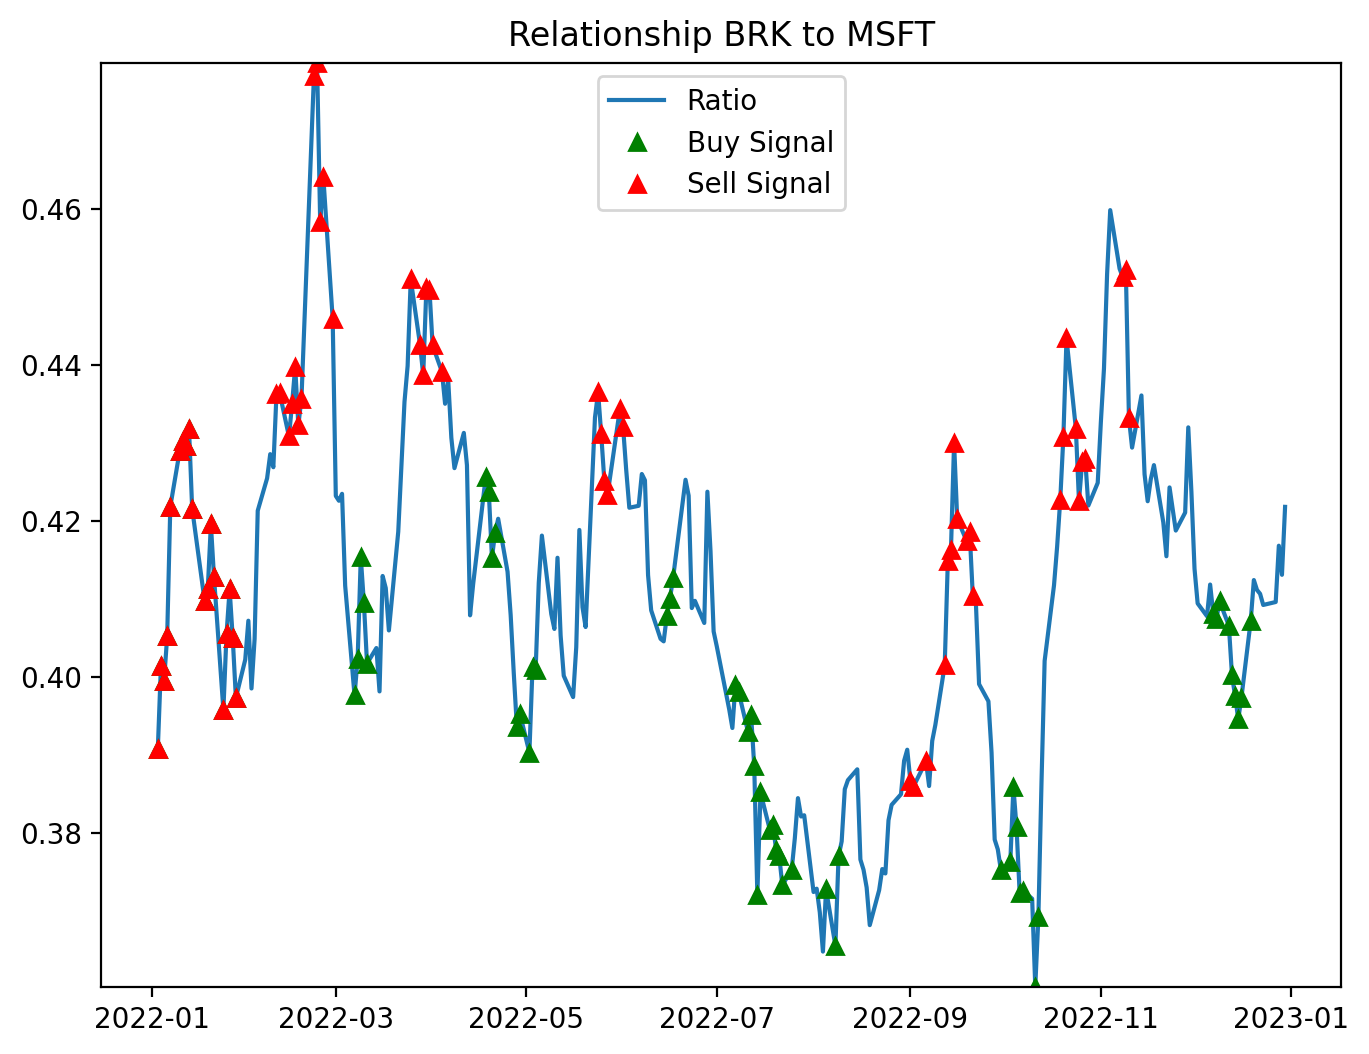

In [99]:
plt.figure(figsize=(8, 6), dpi=200)
buy = jp_hd[['Date','Ratio']].copy()
sell = jp_hd[['Date','Ratio']].copy()
buy.loc[jp_hd['zscore_20_5'] > -1, 'Ratio'] = 0
sell.loc[jp_hd['zscore_20_5'] < 1, 'Ratio'] = 0

plt.plot(jp_hd['Date'], jp_hd['Ratio'])
plt.plot(buy['Date'], buy['Ratio'], linestyle='None', marker='^', color='g')
plt.plot(sell['Date'], sell['Ratio'], linestyle='None', marker='^', color='r')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, jp_hd['Ratio'].min(), jp_hd['Ratio'].max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()